In [ ]:
#importing the required libraries
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

#to check the version of tensorflow
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


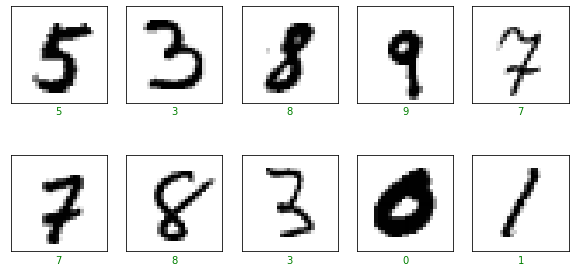

In [ ]:
#for data importing and preprocessing utils file is already defined which contains the function for plottingh also
#it will do one hot encoding along with the pixel normalization also in the helper function
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show()
#this will plot the random images from the training dataset

In [ ]:
#creating a custom layer in keras class
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.aplha = self.add_weight(
            name = 'alpha', shape = (1,),
            initializer = 'zeros',
            trainable = True
        )
        super(ParametricRelu, self).build(input_shape)
        
    def call(self, x):
        return tf.maximum(0., x)+ self.aplha * tf.minimum(0., x)
    #this is the basic logic of the leaky relu that is implemented with the help of alpha

In [ ]:
#we will create the model in function tat will be used for the normal relu and the paramaterized relu both
def create_model(use_prelu = True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10,activation = 'softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
#using the relu according the paramteric relu activations and normal activations of relu in between input and output layers

#instantiating the model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Initial alpha:', model.layers[1].get_weights())
#to check the initial and final value of alpha
#training the model on the dataset

h= model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)

Initial alpha: [array([0.], dtype=float32)]
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2938 - accuracy: 0.9177 - val_loss: 0.1430 - val_accuracy: 0.9581
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1236 - accuracy: 0.9635 - val_loss: 0.1114 - val_accuracy: 0.9660
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0858 - accuracy: 0.9749 - val_loss: 0.0889 - val_accuracy: 0.9715
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.0930 - val_accuracy: 0.9728


In [ ]:
print('Final alpha:', model.layers[1].get_weights())
#to check the final value of alpha

Final alpha: [array([-0.7914647], dtype=float32)]


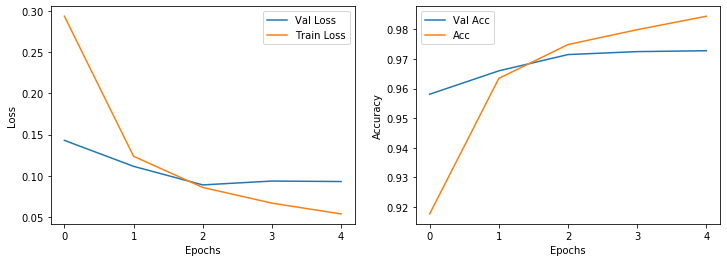

In [ ]:
utils.plot_results(h).show()
#to plot the accuracy and loss using the history object with the utils helper function

In [ ]:
#we will comparsion with the proper usual relu
model = create_model(use_prelu = False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h= model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5
)
#training the model with the general relu activation

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3090 - accuracy: 0.9140 - val_loss: 0.1720 - val_accuracy: 0.9499
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1470 - accuracy: 0.9572 - val_loss: 0.1198 - val_accuracy: 0.9647
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1059 - accuracy: 0.9687 - val_loss: 0.1026 - val_accuracy: 0.9702
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0830 - accuracy: 0.9756 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0865 - val_accuracy: 0.9751


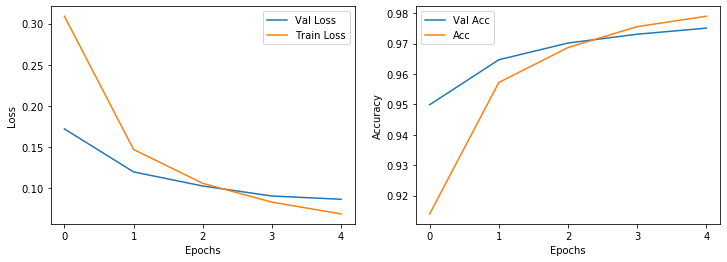

In [ ]:
utils.plot_results(h).show()
#plotting the results of general relu activation model